Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error,r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [ ]:
df = pd.read_csv('/content/Advertising.csv')

In [ ]:
df

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [ ]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [ ]:
df.tail()

,Unnamed: 0,TV,Radio,Newspaper,Sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [ ]:
df.shape

(200, 5)

In [ ]:
df.isna().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [ ]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [ ]:
df = df.drop(['Unnamed: 0'],axis = 1)

In [ ]:
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


Splitting data into independent and dependent variables

In [ ]:
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

<Axes: xlabel='TV'>

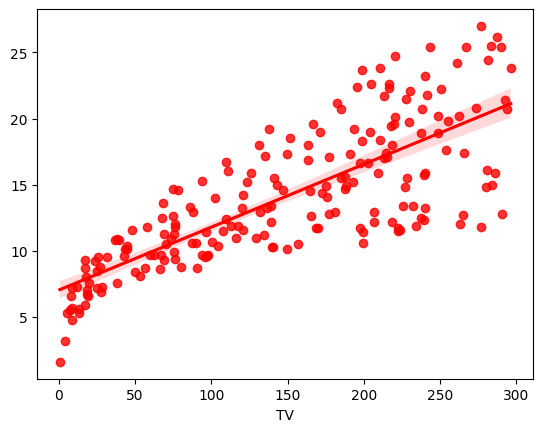

In [ ]:
import seaborn as sns
sns.regplot(x=df['TV'],y=y,color='r')

<Axes: xlabel='Radio'>

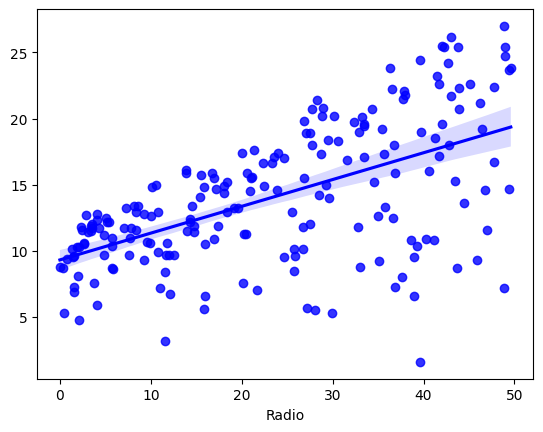

In [ ]:
sns.regplot(x=df['Radio'],y=y,color='blue')

<Axes: xlabel='Newspaper'>

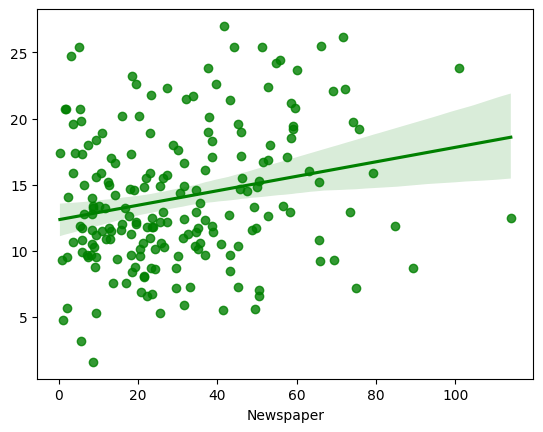

In [ ]:
sns.regplot(x=df['Newspaper'],y=y,color='green')

Training and Testing Data

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

Model Creation

Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred

array([16.5653963 , 21.18822792, 21.55107058, 10.88923816, 22.20231988,
       13.35556872, 21.19692502,  7.35028523, 13.27547079, 15.12449511,
        9.01443026,  6.52542825, 14.30205991,  8.97026042,  9.45679576,
       12.00454351,  8.91549403, 16.15619251, 10.29582883, 18.72473553,
       19.76821818, 13.77469028, 12.49638908, 21.53501762,  7.60860741,
        5.6119801 , 20.91759483, 11.80627665,  9.08076637,  8.51412012,
       12.17604891,  9.9691939 , 21.73008956, 12.77770578, 18.1011362 ,
       20.07590796, 14.26202556, 20.93826535, 10.83938827,  4.38190607,
        9.51332406, 12.40486324, 10.17045434,  8.09081363, 13.16388427,
        5.2243552 ,  9.28893833, 14.09330719,  8.69024497, 11.66119763,
       15.71848432, 11.63156862, 13.35360735, 11.1531472 ,  6.33636845,
        9.76157954,  9.4195714 , 24.25516546,  7.69519137, 12.15317572])

In [ ]:
df1=pd.DataFrame({'Actual _value':y_test,'Predicted_value':y_pred,'Difference':y_test-y_pred})
df1

,Actual _value,Predicted_value,Difference
0,16.9,16.565396,0.334604
1,22.4,21.188228,1.211772
2,21.4,21.551071,-0.151071
3,7.3,10.889238,-3.589238
4,24.7,22.202320,2.497680
5,12.6,13.355569,-0.755569
6,22.3,21.196925,1.103075
7,8.4,7.350285,1.049715
8,11.5,13.275471,-1.775471
9,14.9,15.124495,-0.224495


In [ ]:
print("slope is",model.coef_)

slope is [0.04405928 0.1992875  0.00688245]


In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

Performance Evaluation

In [ ]:
print("MAE",mean_absolute_error(y_test,y_pred))
print("Error percentage is ",mean_absolute_percentage_error(y_test,y_pred))
mean_sq_error=mean_squared_error(y_test,y_pred)
print("Mean squared error is ",mean_sq_error)
print("Root Mean Sqaured Error is ",np.sqrt(mean_sq_error))
print('r2 score is',r2_score(y_test,y_pred))

MAE 1.511669222454909
Error percentage is  0.16298720118158347
Mean squared error is  3.796797236715223
Root Mean Sqaured Error is  1.9485372043446394
r2 score is 0.8609466508230367


Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor
model=DecisionTreeRegressor()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred

array([18.5, 23.8, 17.6,  5.6, 23.8, 15.3, 22.6, 10.1, 12. , 16.6,  8.8,
        8.6, 11.7,  3.2, 10.3, 12.9,  5.6, 17.3,  9.7, 20.2, 17.6, 15.3,
       10.8, 23.8,  9.9,  8.6, 22.6, 12.2, 10.6,  4.8, 11.4,  9.9, 23.8,
        9.3, 15.9, 23.8, 10.4, 17.6, 12.4,  6.6, 11.2, 12.6, 10.4,  9.9,
       12. ,  8.6,  9.7, 15.5,  9.7, 11.8, 13.6, 12.6,  5.6,  5.6,  8.7,
       11.6,  9.9, 24.2,  6.6, 11.4])

In [ ]:
df1=pd.DataFrame({'Actual_value':y_test,'Predicted_value':y_pred,'Difference':y_test-y_pred})
df1

,Actual_value,Predicted_value,Difference
0,16.9,18.5,-1.6
1,22.4,23.8,-1.4
2,21.4,17.6,3.8
3,7.3,5.6,1.7
4,24.7,23.8,0.9
5,12.6,15.3,-2.7
6,22.3,22.6,-0.3
7,8.4,10.1,-1.7
8,11.5,12.0,-0.5
9,14.9,16.6,-1.7


Performance Evaluation

In [ ]:
print("MAE",mean_absolute_error(y_test,y_pred))
print("Error percentage is ",mean_absolute_percentage_error(y_test,y_pred))
mean_sq_error=mean_squared_error(y_test,y_pred)
print("Mean squared error is ",mean_sq_error)
print("Root Mean Sqaured Error is ",np.sqrt(mean_sq_error))
print('r2 score is',r2_score(y_test,y_pred))

MAE 1.0100000000000005
Error percentage is  0.08473596518329883
Mean squared error is  1.7240000000000004
Root Mean Sqaured Error is  1.3130118049735884
r2 score is 0.9368604750174955


Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred

array([17.756, 21.395, 20.277,  6.444, 23.302, 12.982, 22.651,  9.646,
       12.258, 15.991,  8.419,  8.997, 12.134,  4.406, 10.514, 12.45 ,
        5.785, 16.677, 10.808, 19.543, 19.998, 13.14 , 10.686, 22.245,
        9.919,  8.988, 22.078, 12.503, 10.046,  5.25 , 11.357, 10.663,
       21.892,  8.162, 15.215, 20.378, 11.934, 20.122, 12.538,  7.669,
       11.592, 12.886, 10.378,  9.757, 11.841,  8.857, 10.665, 15.488,
       10.672, 11.682, 13.542, 12.402,  6.093,  5.827,  8.939, 11.443,
       10.437, 25.339,  6.982, 12.074])

In [ ]:
df1=pd.DataFrame({'Actual_value':y_test,'Predicted_value':y_pred,'Difference':y_test-y_pred})
df1

,Actual_value,Predicted_value,Difference
0,16.9,17.756,-0.856
1,22.4,21.395,1.005
2,21.4,20.277,1.123
3,7.3,6.444,0.856
4,24.7,23.302,1.398
5,12.6,12.982,-0.382
6,22.3,22.651,-0.351
7,8.4,9.646,-1.246
8,11.5,12.258,-0.758
9,14.9,15.991,-1.091


In [ ]:
print("MAE",mean_absolute_error(y_test,y_pred))
print("Error percentage is ",mean_absolute_percentage_error(y_test,y_pred))
mean_sq_error=mean_squared_error(y_test,y_pred)
print("Mean squared error is ",mean_sq_error)
print("Root Mean Sqaured Error is ",np.sqrt(mean_sq_error))
print('r2 score is',r2_score(y_test,y_pred))

MAE 0.6099333333333324
Error percentage is  0.055221550774144416
Mean squared error is  0.5093160999999992
Root Mean Sqaured Error is  0.7136638564478371
r2 score is 0.9813468813109387
